# Walmart Recruiting - Store Sales Forecasting

## 定義問題
* 這個問題是如何產生的？這個問題的預期產出是什麼？預測每個商店每個部門的每週銷售額
* 它提供了哪些資訊、資料與變數？商店的類型和規模、是否為特殊假期週、消費者物價指數、失業率等
* 會對這個問題可以產生什麼結果？瞭解銷售情況來做進一步的對策

## 選擇什麼方法？
* 是監督還是非監督學習？監督式學習
* 是分類還是回歸？回歸問題

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## load data

In [2]:
stores = pd.read_csv("stores.csv")
print(stores.shape)
stores.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [3]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
features = pd.read_csv("features.csv")
print(features.shape)
features.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# EDA

In [6]:
df_train = train.merge(features, on=["Store", "Date", "IsHoliday"], how = "inner").merge(stores, on=["Store"], how="inner")
print(df_train.shape)
df_train.head()

(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [8]:
df_test = test.merge(features, on=["Store", "Date", "IsHoliday"], how = "inner").merge(stores, on=["Store"], how="inner")
print(df_test.shape)
df_test.head()

(115064, 15)


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     114915 non-null  float64
 7   MarkDown2     86437 non-null   float64
 8   MarkDown3     105235 non-null  float64
 9   MarkDown4     102176 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           76902 non-null   float64
 12  Unemployment  76902 non-null   float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


## 檢查缺失值

In [10]:
# 計算訓練集中各列的缺失值比例
train_missing_values = df_train.isnull().sum()

# 計算測試集中各列的缺失值比例
test_missing_values = df_test.isnull().sum()

# 顯示結果
print("Train 各列中的缺失值：")
print(train_missing_values)
print("------------------------")
print("Test 各列中的缺失值：")
print(test_missing_values)

Train 各列中的缺失值：
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64
------------------------
Test 各列中的缺失值：
Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64


## 處理時間數據(將Date轉成year/mouth/week)好讓之後跟weekly_sales做分析

In [11]:
# 處理train時間數據
df_train["Date"] = pd.to_datetime(df_train["Date"], format="%Y-%m-%d")
df_train["Year"] = df_train["Date"].dt.year
df_train["Month"] = df_train["Date"].dt.month
# df_train["Day"] = df_train["Date"].dt.day
df_train["Week"] = df_train["Date"].dt.isocalendar().week
df_train = df_train.drop("Date", axis=1)
print(df_train.shape)
df_train.head()

(421570, 18)


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
1,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
2,1,3,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
3,1,4,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
4,1,5,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5


In [12]:
# 處理test時間數據
df_test["Date"] = pd.to_datetime(df_test["Date"], format="%Y-%m-%d")
df_test["Year"] = df_test["Date"].dt.year
df_test["Month"] = df_test["Date"].dt.month
# df_test["Day"] = df_test["Date"].dt.day
df_test["Week"] = df_test["Date"].dt.isocalendar().week
df_test = df_test.drop("Date", axis=1)
print(df_test.shape)
df_test.head()

(115064, 17)


,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
1,1,2,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
2,1,3,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
3,1,4,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
4,1,5,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44


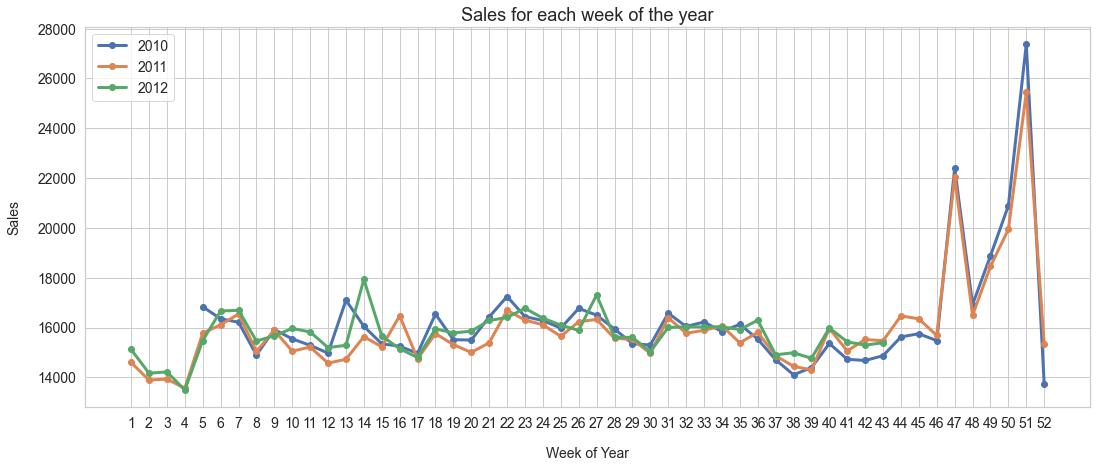

In [13]:
# 分析2010/2011/2012三年中每一周的銷售
weekly_sales_2010 = df_train[df_train["Year"]==2010].groupby("Week")["Weekly_Sales"].mean()
weekly_sales_2011 = df_train[df_train["Year"]==2011].groupby("Week")["Weekly_Sales"].mean()
weekly_sales_2012 = df_train[df_train["Year"]==2012].groupby("Week")["Weekly_Sales"].mean()

sns.set(style="whitegrid")
plt.figure(figsize=(18,7))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, linewidth=3.0, marker="o", ms=6)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, linewidth=3.0, marker="o", ms=6)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, linewidth=3.0, marker="o", ms=6)

plt.xticks(np.arange(1, 53), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Week of Year", fontsize=14, labelpad=16)
plt.ylabel("Sales", fontsize=14, labelpad=16)
plt.title("Sales for each week of the year", fontsize=18)
plt.legend(["2010", "2011", "2012"], fontsize=14)
plt.show()

## holiday

* Super Bowl: 第6周

* Labor Day: 第36周

* Thanksgiving: 第47周

* Christmas: 第51周

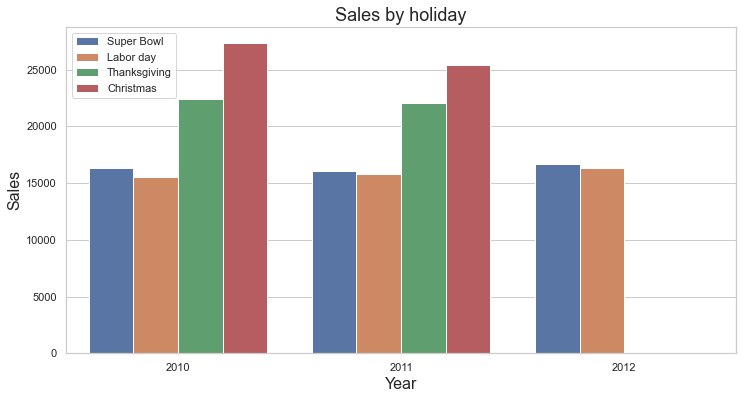

In [14]:
# 分析sales by holiday
holiday = {6:"Super Bowl", 36:"Labor day", 47:"Thanksgiving", 51:"Christmas"}
df_holiday = df_train[df_train["Week"].isin([6,36,47,51])]
holiday_sales = df_holiday.groupby(["Year","Week"])["Weekly_Sales"].mean().reset_index()
holiday_sales = holiday_sales.rename(columns={"Week":"Holiday"})
holiday_sales["Holiday"] = holiday_sales["Holiday"].map(holiday)
holiday_sales
# 繪製銷售圖
plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="Weekly_Sales", hue="Holiday", data=holiday_sales)

plt.title('Sales by holiday', fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.legend()
plt.show()

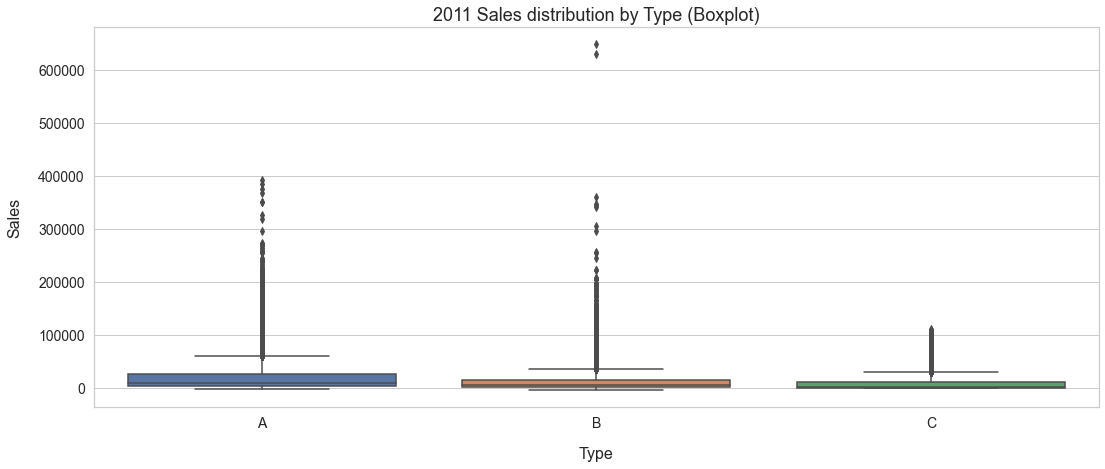

In [15]:
# 分析sales by size/type
plt.figure(figsize=(18,7))
sales_2011 = df_train[df_train["Year"]==2011]

sns.boxplot(x='Type', y='Weekly_Sales', data=sales_2011)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Type", fontsize=16, labelpad=16)
plt.ylabel("Sales", fontsize=16, labelpad=16)
plt.title("2011 Sales distribution by Type (Boxplot)", fontsize=18)
plt.show()

## 檢查特徵分佈

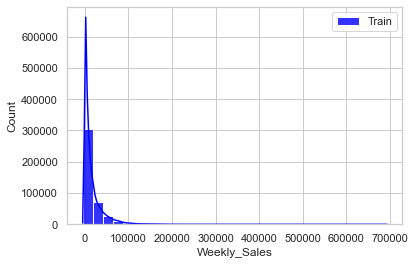

In [16]:
sns.histplot(df_train["Weekly_Sales"], kde=True, bins=30, color='blue', label='Train', alpha=0.8)
plt.legend()

# 調整子圖布局
plt.show()

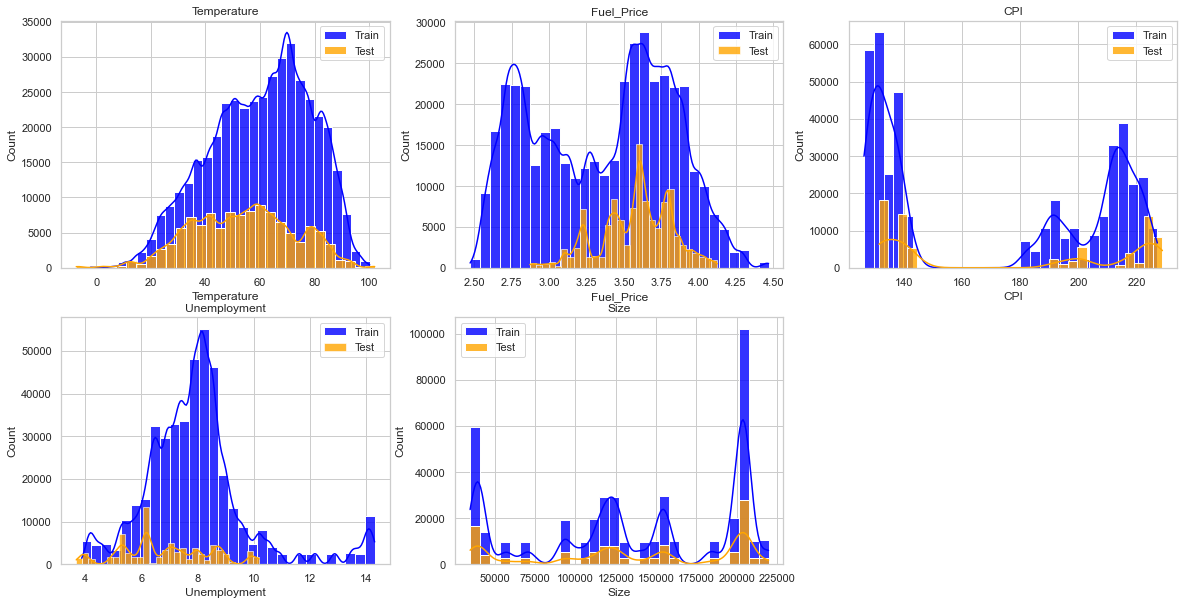

In [17]:
plt.figure(figsize=(20, 10))
# 選擇要檢查分佈的特徵
features_to_plot = ["Temperature", "Fuel_Price", "CPI", "Unemployment", "Size"]

# 繪製直方圖
for feature in features_to_plot:
    plt.subplot(2, 3, features_to_plot.index(feature) + 1)
    sns.histplot(df_train[feature], kde=True, bins=30, color='blue', label='Train', alpha=0.8)
    sns.histplot(df_test[feature], kde=True, bins=30, color='orange', label='Test', alpha=0.8)
    plt.title(feature)
    plt.legend()

# 調整子圖布局
plt.show()

## 相關矩陣

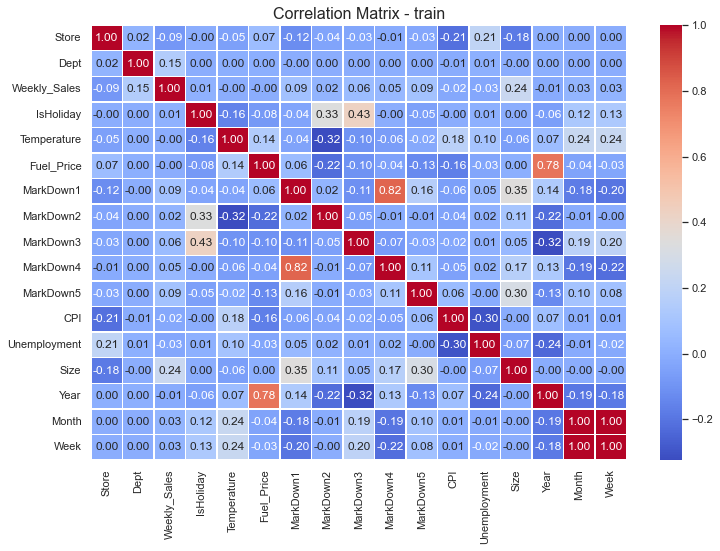

In [18]:
# 設定圖形大小
plt.figure(figsize=(12, 8))

# 計算相關矩陣
correlation_matrix = df_train.corr()

# 繪製相關矩陣的熱圖
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# 設定圖的標題
plt.title('Correlation Matrix - train', fontsize=16)

# 顯示圖
plt.show()

## 清理資料

### 檢查資料與確認缺失值
1. 是否有遺漏值/缺失值 (Missing value)   
   Training Dataset 中 MarkDown1~5 欄位缺失值很多, Testing Dataset 中 CPI, Unemployment 也有約1/3的缺失值
2. 是否有極值或異常值 (Outlier)  
   從分布圖來看, Weekly_Sales 有極值
3. 資料分布是否符合常態 (Normal Distribution)  
   Features 不太符合常態分布
4. 資料是否需要清洗 (Clean Data)  
   Yes, 如下方清單
   
### 進行資料加工
1. (Train/Test) 移除缺失值太多的欄位 MarkDown1~5, CPI, Unemployment
2. (Train/Test) 移除與Weekly_Sales correlation 較低的欄位Temperature, Fuel_Price 以及 Month(與Week correlation=1)
3. (Train/Test) IsHoliday, Type 欄位轉換成數字形式
4. 完成後, 確認缺失值與目前的資料表內容

In [19]:
# 1. (Train/Test) 移除缺失值太多的欄位 MarkDown1~5, CPI, Unemployment
# 2. (Train/Test) 移除與Weekly_Sales correlation 較低的欄位Temperature, Fuel_Price 以及 Month(與Week correlation=1)
df_train = df_train.drop(["Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4",
                          "MarkDown5","CPI", "Unemployment","Month"],axis=1)
df_test = df_test.drop(["Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4",
                        "MarkDown5","CPI", "Unemployment","Month"],axis=1)

In [20]:
# 3. (Train/Test) IsHoliday, Type 欄位轉換成數字形式

# IsHoliday
df_train["IsHoliday"] = df_train["IsHoliday"].astype(int)
df_test["IsHoliday"] = df_test["IsHoliday"].astype(int)

# Type
# 創建一個字典，將 A、B、C 映射到 1、2、3
type_mapping = {"A": 1, "B": 2, "C": 3}

# 將 "Type" 欄位中的字母替換為對應的數字
df_train["Type"] = df_train["Type"].replace(type_mapping) # 也可以用 .map
df_test["Type"] = df_test["Type"].replace(type_mapping)

In [21]:
# 4. 確認缺失值與目前的資料表內容
print(df_train.isnull().sum())
print("---")
print(df_train.shape)
df_train.head()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Year            0
Week            0
dtype: int64
---
(421570, 8)


,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Year,Week
0,1,1,24924.50,0,1,151315,2010,5
1,1,2,50605.27,0,1,151315,2010,5
2,1,3,13740.12,0,1,151315,2010,5
3,1,4,39954.04,0,1,151315,2010,5
4,1,5,32229.38,0,1,151315,2010,5


In [22]:
print(df_test.isnull().sum())
print("---")
print(df_test.shape)
df_test.head()

Store        0
Dept         0
IsHoliday    0
Type         0
Size         0
Year         0
Week         0
dtype: int64
---
(115064, 7)


,Store,Dept,IsHoliday,Type,Size,Year,Week
0,1,1,0,1,151315,2012,44
1,1,2,0,1,151315,2012,44
2,1,3,0,1,151315,2012,44
3,1,4,0,1,151315,2012,44
4,1,5,0,1,151315,2012,44


## 建立model然後predict

### 特徵預處理 (Preprocessing)
1. 先將特徵矩陣 自變數/應變數 區分出來
2. 使用StandardScaler進行處理特徵矩陣

In [23]:
# 1. 先將特徵矩陣 自變數/應變數 區分出來
train_Y = df_train["Weekly_Sales"]
train_X = df_train.drop(["Weekly_Sales"], axis=1)
test_X = df_test

In [24]:
# 2. 使用StandardScaler進行處理特徵矩陣
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler().fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns=train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)

### 準備訓練／測試集 (Train / Test Split)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

### 回歸模型選擇

### 1. Decision Tree
### 2. Random Forest
### 3. XGBoost
### 4. LightGBM

### 回歸模型評估

### RMSE(數值越小越好)

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error

## 1. Decision Tree

In [27]:
# 初始化Decision Tree模型
dt = DecisionTreeRegressor(random_state=42)

# 訓練模型
dt.fit(X_train, y_train)

# 預測測試集
dt_predictions = dt.predict(X_test)

# 計算 RMSE 評分
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
print("Decision Tree Root Mean Squared Error (RMSE):", dt_rmse)

Decision Tree Root Mean Squared Error (RMSE): 4108.008439061411


In [28]:
'''
dt_pred = dt.predict(test_X)
sub = pd.DataFrame()
sub["Id"] = test["Store"].astype(str) + "_" + test["Dept"].astype(str) + "_" + test["Date"]
sub["Weekly_Sales"] = dt_pred
sub.to_csv("submission_Decision Tree.csv", index=False)
'''

'\ndt_pred = dt.predict(test_X)\nsub = pd.DataFrame()\nsub["Id"] = test["Store"].astype(str) + "_" + test["Dept"].astype(str) + "_" + test["Date"]\nsub["Weekly_Sales"] = dt_pred\nsub.to_csv("submission_Decision Tree.csv", index=False)\n'

## 2. Random Forest

In [29]:
# 初始化Random Forest模型
rf = RandomForestRegressor(random_state=42)

# 訓練模型
rf.fit(X_train, y_train)

# 預測測試集
rf_predictions = rf.predict(X_test)

# 計算 RMSE 評分
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 3427.393912039898


In [30]:
# 調參
param_grid = {
    'n_estimators': list(range(5,100,5)),
    'max_depth': list(range(1,20))
}

# 找出最佳超參數
rd_search = RandomizedSearchCV(rf, param_grid, scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)
rd_search.fit(X_train, y_train)

# 打印最佳超參數
print("Best parameters:", rd_search.best_params_)

# 使用最佳超參數訓練模型
best_model = RandomForestRegressor(**rd_search.best_params_)
best_model.fit(X_train, y_train)

# 預測測試集
y_pred = best_model.predict(X_test)

# 計算 RMSE 評分
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest RMSE:", rmse)

Best parameters: {'n_estimators': 75, 'max_depth': 18}
Random Forest RMSE: 3685.2859389133796


In [31]:
'''
rf_pred = best_model.predict(test_X)
sub = pd.DataFrame()
sub["Id"] = test["Store"].astype(str) + "_" + test["Dept"].astype(str) + "_" + test["Date"]
sub1 = pd.DataFrame()
sub1["Id"] = sub["Id"]
sub1["Weekly_Sales"] = rf_pred
sub1.to_csv("submission_Random Forest.csv", index=False)
'''

'\nrf_pred = best_model.predict(test_X)\nsub = pd.DataFrame()\nsub["Id"] = test["Store"].astype(str) + "_" + test["Dept"].astype(str) + "_" + test["Date"]\nsub1 = pd.DataFrame()\nsub1["Id"] = sub["Id"]\nsub1["Weekly_Sales"] = rf_pred\nsub1.to_csv("submission_Random Forest.csv", index=False)\n'

## XGBoost

In [32]:
# 引入XGBoost模型
from xgboost import XGBRegressor

# 初始化XGBoost模型
xgb = XGBRegressor(random_state=42)

# 訓練模型
xgb.fit(X_train, y_train)


# 預測測試集
xgb_predictions = xgb.predict(X_test)

# 計算 RMSE 評分
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print("XGBoost RMSE:", xgb_rmse)

XGBoost RMSE: 5453.865425199965


In [33]:
param_grid = {
    'n_estimators': list(range(5,100,5)),
    'max_depth': list(range(1,20))
}

rd_search = RandomizedSearchCV(xgb, param_grid, scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)
rd_search.fit(X_train, y_train)

# 打印最佳超參數
print("Best parameters:", rd_search.best_params_)

# 使用最佳超參數訓練模型
xgb_best_model = XGBRegressor(**rd_search.best_params_)
xgb_best_model.fit(X_train, y_train)

# 預測測試集
xgb_y_pred = xgb_best_model.predict(X_test)

# 計算 RMSE 評分
rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
print("XGBoost RMSE:", rmse)

Best parameters: {'n_estimators': 55, 'max_depth': 14}
XGBoost RMSE: 2703.643212933377


In [34]:
xgb_pred = best_model.predict(test_X)
sub = pd.DataFrame()
sub["Id"] = test["Store"].astype(str) + "_" + test["Dept"].astype(str) + "_" + test["Date"]
sub2 = pd.DataFrame()
sub2["Id"] = sub["Id"]
sub2["Weekly_Sales"] = xgb_pred
sub2.to_csv("submission_XGBoost.csv", index=False)

## LightGBM

In [35]:
import lightgbm as lgb
# 初始化XGBoost模型
lgbm = lgb.LGBMRegressor(random_state=42)

# 訓練模型
lgbm.fit(X_train, y_train)

# 預測測試集
lgbm_predictions = lgbm.predict(X_test)

# 計算 RMSE 評分
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_predictions))
print("LightGBM RMSE:", lgbm_rmse)

LightGBM RMSE: 7010.955600600714


In [36]:
param_grid = {
    'n_estimators': list(range(5,100,5)),
    'max_depth': list(range(1,20))
}

rd_search = RandomizedSearchCV(lgbm, param_grid, scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)
rd_search.fit(X_train, y_train)

# 打印最佳超參數
print("Best parameters:", rd_search.best_params_)

# 使用最佳超參數訓練模型
lgbm_best_model = XGBRegressor(**rd_search.best_params_)
lgbm_best_model.fit(X_train, y_train)

# 預測測試集
lgbm_y_pred = lgbm_best_model.predict(X_test)

# 計算 RMSE 評分
rmse = np.sqrt(mean_squared_error(y_test, lgbm_y_pred))
print("LightGBM RMSE:", rmse)

Best parameters: {'n_estimators': 90, 'max_depth': 11}
LightGBM RMSE: 2843.3990776733563


In [37]:
lgbm_pred = lgbm_best_model.predict(test_X)
sub = pd.DataFrame()
sub["Id"] = test["Store"].astype(str) + "_" + test["Dept"].astype(str) + "_" + test["Date"]
sub3 = pd.DataFrame()
sub3["Id"] = sub["Id"]
sub3["Weekly_Sales"] = lgbm_pred
sub3.to_csv("submission_LightGBM.csv", index=False)

# 結論
### 1.每周的銷售額會因為是不是Holiday有顯著差異, 尤其是感恩節和聖誕節的銷售額
### 2.Type A 的商店規模(Size)和銷售額都比 Type B 和 C 來得好
### 3.XGBoost > LightGBM > Random Forest > Decision Tree
### 4.未來可以研究LSTM model